In [145]:
import pandas as pd
df = pd.read_csv('./Mittaus 1/Accelerometer.csv',decimal= '.', delimiter=',')
df.head()

,time,seconds_elapsed,z,y,x
0,1696508104459439600,0.143440,-2.846008,-0.581977,-0.468246
1,1696508104475217200,0.159217,-2.651466,-0.560432,-0.418557
2,1696508104491116800,0.175117,-2.132024,-0.366186,-0.535990
3,1696508104506986000,0.190986,-1.023350,-0.041039,-0.522485
4,1696508104522763500,0.206763,-0.449766,0.229015,-0.356920


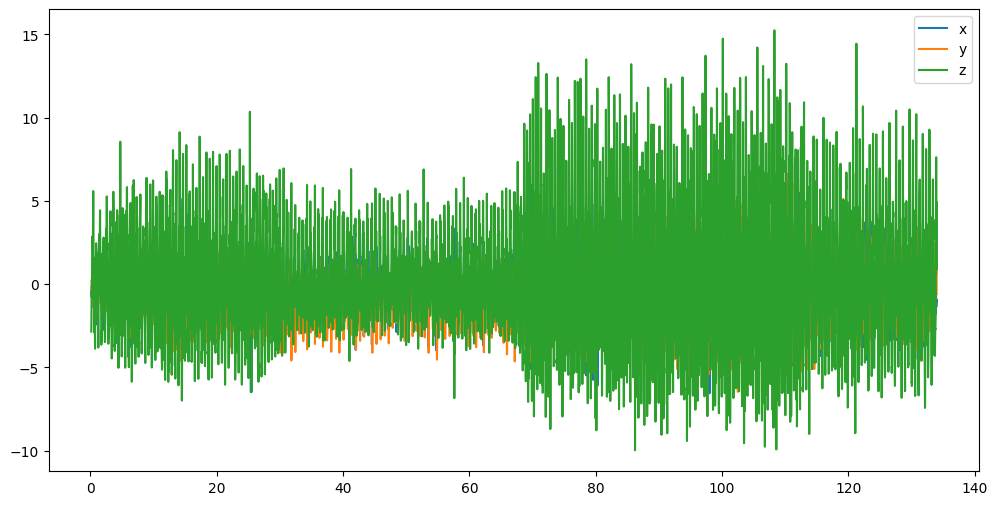

time              -4.412130e+18
seconds_elapsed    5.663271e+05
z                  2.560217e+04
y                  1.312873e+04
x                  9.603944e+03
dtype: float64

In [146]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
plt.plot(df['seconds_elapsed'],df['x'])
plt.plot(df['seconds_elapsed'],df['y'])
plt.plot(df['seconds_elapsed'],df['z'])
#plt.plot(df['Time (s)'],df['Absolute acceleration (m/s^2)'])
plt.legend(['x', 'y','z'])
plt.show()
(df.abs()).sum()

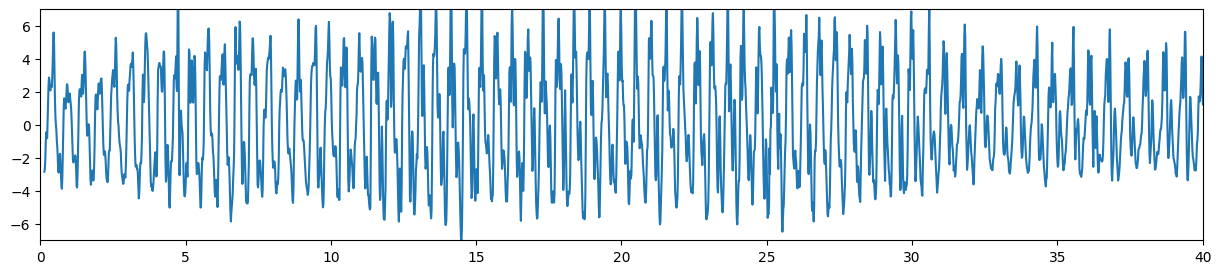

In [147]:
#Valitaan analyysiin z-komponentti.
fig = plt.figure(figsize=(15,3))
plt.plot(df['seconds_elapsed'],df['z'])
plt.axis([0, 40, -7, 7])
plt.show()

In [148]:
#Määritellään filtterit

from scipy.signal import butter,filtfilt
#Asenna scipy pipillä jos on tarvis

def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

In [189]:
#Datan soudatus
noisy_signal = df['z']

# Filtterin parametrit    
T= df['seconds_elapsed'][len(df)-1] - df['seconds_elapsed'][0]              # Koko datan pituus
n = int(len(df['seconds_elapsed'])) # Näytteiden lukumäärä
fs = n/T                # Näytteenottotaajuus (oletetaan vakioksi)

cutoff = 1/(0.6)         # Alipäästösuodattimen taajuus, Hz
#cutoff2 = 1/(5)         # Ylipäästösuodattimen taajuus, Hz

nyq = 0.5 * fs          # Nyquistin taajuus
order = 1               # Kertaluku

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff, fs, nyq, order)
#highpass_filtered = butter_highpass_filter(noisy_signal, cutoff2, fs, nyq, order)

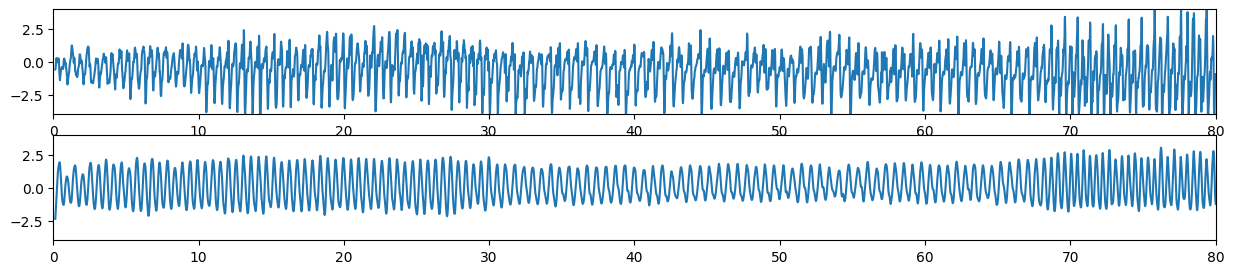

In [190]:
fig = plt.figure(figsize=(15,3))
plt.subplot(2,1,1)
plt.plot(df['seconds_elapsed'],df['y'])
plt.axis([0, 80, -4, 4])
plt.subplot(2,1,2)
plt.plot(df['seconds_elapsed'],lowpass_filtered)
plt.axis([0, 80, -4, 4])
plt.show()

In [191]:
steps = 0
for i in range(lowpass_filtered.shape[0]-1):
    if lowpass_filtered[i]/lowpass_filtered[i+1] < 0:
        steps = steps + 0.5
        
print(steps)

256.5


In [192]:
#Lasketaan keskimääräinen askelpituus, käytetään datasta saatua ja laskettua metrimäärää 202

distance = 202

stridelength = distance/steps*100
print('Your average stridelength is',round(stridelength), 'centimeters')

Your average stridelength is 79 centimeters
